<a href="https://colab.research.google.com/github/matheus-mtz/mvp_puc_sprint1/blob/main/mvp_puc_weightlifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós-Graduação em Ciência de Dados e Analitycs - PUC-Rio**

## ***MVP - Sprint I: Análise de Dados e Boas Práticas***

### ***Uma análise sobre desempenho em campeonatos de Powerlifiting nos Estados Unidos em 2020***

####Autor: Matheus Martinez de Carvalho

#####Pontifícia Universidade Católica do Rio de Janeiro
#####Maio de 2023

#Contextualiazação

---

O *Powerlifting* é um esporte de força que consiste em três tentativas de peso máximo em três levantamentos (exercícios): agachamento, supino e levantamento terra. Como no levantamento de peso olímpico, envolve o atleta tentando um esforço máximo de levantamento único de peso de uma barra carregada com anilhas de peso.

#Problema proposto

---

O trabalho aqui exposto busca, através de ferramentas de análise exploratória e visualização de dados, dar ferramentas de apoio à decisão à uma equipe fictícia de *Powerlifiting* que deseja traçar estratégias para os seus atletas durante a temporada.

#Base de dados#

---

A base de dados que será apresentada neste trabalho é composta por levantadores de peso que competiram nos Estados Unidos em eventos de *Powerlifiting* de 2015 até 2020.

A descrição completa das variáveis pode ser encontrada no ***Arquivo READ ME do diretório***: https://raw.githubusercontent.com/matheus-mtz/mvp_puc_sprint1/main/README.md

Download: https://www.kaggle.com/datasets/brianmcabee/us-powerlifting-competition-data-2015now
data e horário de download: 25/04/2023 14:00



In [1]:
import pandas as pd
import statistics  as sts
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importar dados
dataset = pd.read_csv("https://raw.githubusercontent.com/matheus-mtz/mvp_puc_sprint1/master/powerlifting_puc2.csv", sep=",")
#visulizar
dataset.head()

,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,...,Dots,Wilks,Tested,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,1306447,Billy Hernandez,M,SBD,Raw,24.0,24-34,24-39,Open,59.96,...,384.25,388.29,NaN,USPA,IPL,2015-01-10,USA,CA,Oceanside,Camp Pendleton Open
1,505543,Shon Paul Dukes,M,SBD,Raw,15.0,13-15,14-18,MR-O,65.20,...,247.09,247.86,Yes,USAPL,IPF,2015-01-10,USA,LA,NaN,LOUISIANA STATE POWERLIFTING CHAMPIONSHIP
2,505544,Michael Gintzler,M,SBD,Raw,20.5,20-23,19-23,MR-O,71.30,...,367.16,365.83,Yes,USAPL,IPF,2015-01-10,USA,LA,NaN,LOUISIANA STATE POWERLIFTING CHAMPIONSHIP
3,505546,Daniel Vanderberg,M,SBD,Raw,27.5,24-34,24-39,MR-O,70.90,...,355.54,354.38,Yes,USAPL,IPF,2015-01-10,USA,LA,NaN,LOUISIANA STATE POWERLIFTING CHAMPIONSHIP
4,505547,Ian Rowe,M,SBD,Raw,25.5,24-34,24-39,MR-O,66.10,...,328.71,329.37,Yes,USAPL,IPF,2015-01-10,USA,LA,NaN,LOUISIANA STATE POWERLIFTING CHAMPIONSHIP


In [3]:
#Instâncias e atributos
dataset.shape

(179725, 38)

O dataset original apresenta 38 atributos (categorias) e 179725 instâncias (registros de atletas)

In [4]:
#nome das colunas do dataset
for col in dataset.columns:
    print(col)

Unnamed: 0
Name
Sex
Event
Equipment
Age
AgeClass
BirthYearClass
Division
BodyweightKg
WeightClassKg
Squat1Kg
Squat2Kg
Squat3Kg
Squat4Kg
Best3SquatKg
Bench1Kg
Bench2Kg
Bench3Kg
Bench4Kg
Best3BenchKg
Deadlift1Kg
Deadlift2Kg
Deadlift3Kg
Deadlift4Kg
Best3DeadliftKg
TotalKg
Place
Dots
Wilks
Tested
Federation
ParentFederation
Date
MeetCountry
MeetState
MeetTown
MeetName


In [5]:
#quantidade de linhas por coluna
dataset.count()

Unnamed: 0          179725
Name                179725
Sex                 179725
Event               179725
Equipment           179725
Age                 168461
AgeClass            171563
BirthYearClass      163401
Division            179673
BodyweightKg        179545
WeightClassKg       179647
Squat1Kg            114749
Squat2Kg            114076
Squat3Kg            112401
Squat4Kg               797
Best3SquatKg        176663
Bench1Kg            114523
Bench2Kg            113857
Bench3Kg            112224
Bench4Kg               584
Best3BenchKg        175896
Deadlift1Kg         114155
Deadlift2Kg         112944
Deadlift3Kg         110942
Deadlift4Kg           1318
Best3DeadliftKg     176547
TotalKg             172077
Place               179725
Dots                171964
Wilks               171964
Tested              120018
Federation          179725
ParentFederation    160002
Date                179725
MeetCountry         179725
MeetState           178357
MeetTown             97366
M

In [6]:
#tipos de dados dos atributos
dataset.dtypes

Unnamed: 0            int64
Name                 object
Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Tested               object
Federation           object
ParentFederation     object
Date                 object
MeetCountry          object
MeetState           

Foram verificados os tipos de dados das variáveis e encontrada uma incompatibidade. A variável "Date" consta como objeto, esta situação será tratada na etapa de "Pré-processamento de dados".

In [7]:
#contamos valores NAs
dataset.isnull().sum()

Unnamed: 0               0
Name                     0
Sex                      0
Event                    0
Equipment                0
Age                  11264
AgeClass              8162
BirthYearClass       16324
Division                52
BodyweightKg           180
WeightClassKg           78
Squat1Kg             64976
Squat2Kg             65649
Squat3Kg             67324
Squat4Kg            178928
Best3SquatKg          3062
Bench1Kg             65202
Bench2Kg             65868
Bench3Kg             67501
Bench4Kg            179141
Best3BenchKg          3829
Deadlift1Kg          65570
Deadlift2Kg          66781
Deadlift3Kg          68783
Deadlift4Kg         178407
Best3DeadliftKg       3178
TotalKg               7648
Place                    0
Dots                  7761
Wilks                 7761
Tested               59707
Federation               0
ParentFederation     19723
Date                     0
MeetCountry              0
MeetState             1368
MeetTown             82359
M

Foi verificada a existência de dados faltantes e encontrados dois problemas:
- atletas sem idade registrada,
- atletas sem peso registrados,


 tais situações serão tratadas na etapa de "Pré-processamento de dados".

In [8]:
#Verificando domínio e frequência de participantes para a variável sexo
dataset['Sex'].value_counts()


M    114322
F     65403
Name: Sex, dtype: int64

Foram verificadas as grafias apresentadas na coluna de "sexo" e não houve a necessidade de correções.

São totalizados 114.322 registros de atletas do sexo masculino e 65.403 registros de atletas do sexo feminino.

In [ ]:
dataset.describe()

#***Pré-processamento de dados***#

---

##***Transformações de dados***#

-  Os atletas que apresentam NAs para a variável **Tested** (teste anti-dopagem) serão lançados como "No" **(Não testados)**;
- Será realizado o processo de One-Hot Encoding para a variável ***Tested***;
- Os atletas que apresentaram idade fracionária (.5) terão suas idades arredondadas para cima. Nas notas explicativas é especificado que tais atletas tiveram em suas idades o acréscimo de 0.5, pois não tiveram suas datas de aniversário informadas;
- Serão criadas colunas de mês e ano.

---

##***Filtragem da base de dados***#

Analisados os dados faltantes, serão excluídos da análise os seguintes atletas pelos respectivos motivos:
-  Atletas que não tiveram seus pesos registrados (BodyweightKg), pois não trazem confiabilidade sobre os dados apresentados em um esporte em que o peso corporal é de grande importância;
- Atletas que não tiveram suas idades registradas (Age), pois não trazem confiabilidade sobre os dados apresentados.

In [10]:
#Verificando domínio e frequência de participantes para a variável Tested (testagem anti-dopagem)
dataset['Tested'].value_counts()

Yes    120018
Name: Tested, dtype: int64

In [11]:
#Substituir NANs da variável Tested por "No" (NÃO TESTADO)
dataset['Tested'].fillna("No", inplace = True)

#Realizar o processo de One-Hot Encoding
dataset_2 = pd.get_dummies(dataset, columns=['Tested'])


***Observação*** O workframe "dataset_2" não será utilizado neste trabalho, porém será útil quando necessária a aplicação de algoritmos de machine learning.

In [12]:
#Linhas duplicadas
duplicados = dataset.duplicated()
duplicados.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
179720    False
179721    False
179722    False
179723    False
179724    False
Length: 179725, dtype: bool>

***Não foram encontradas linhas duplicadas***

In [14]:
#Arredondar idades e Exclusão de atletas que não tiveram suas idades registradas
dataset['Age'].fillna(0, inplace = True)
dataset['Age2'] = dataset['Age'].apply(lambda x: math.ceil(x))
dataset = dataset.drop(dataset.loc[dataset['Age'] <= 0].index)

In [15]:
#Exlusão de atletas que não tiveram seus pesos corporais registrados
dataset['BodyweightKg'].fillna(0, inplace = True)
dataset = dataset.drop(dataset.loc[dataset['BodyweightKg'] <= 0].index)

In [17]:
#Criar colunas de mês e ano
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['month'] = dataset['Date'].dt.month
dataset['year'] = dataset['Date'].dt.year


In [ ]:
dataset.head()

#***Análise exploratória***#

---

No problema fictício aqui proposto, veremos uma análise sobre o ano de 2020, último ano disponível, como uma estratégia de análise sobre a temporada anterior.

- Participação(%) de homens e mulheres no esporte;
- alcance(%) da testagem anti-doping para ambos os sexos;
- distribuição e estatísticas sobre as idades dos atletas para ambos os sexos;
- distribuição dos atletas por peso para ambos os sexos;
- relação massa corporal x carga total levantada;
- campeonatos com mais atletas do sexo feminino inscritas.

In [21]:
#Reduzindo a dimensionalidade do framework
df_red = dataset[['Name', 'Sex', 'Age2', 'AgeClass', 'Tested',
                            'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
                            'TotalKg', 'MeetState', 'MeetName', 'month', 'year']]

In [22]:
#Filtrando 2020
df_2020 = df_red[(df_red['year'] == 2020)]
df_2020.describe()

,Age2,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,month,year
count,14066.000000,14066.000000,13788.000000,13712.000000,13787.000000,13402.000000,14066.000000,14066.0
mean,29.226646,84.782784,165.162409,106.816737,191.726610,463.745296,4.298379,2020.0
std,11.616754,22.050251,59.607189,44.641714,59.936832,159.700707,3.174470,0.0
min,6.000000,21.850000,10.000000,9.500000,32.500000,54.500000,1.000000,2020.0
25%,21.000000,69.227500,117.500000,67.500000,142.500000,327.500000,2.000000,2020.0
50%,26.000000,81.800000,165.000000,107.500000,192.500000,467.500000,3.000000,2020.0
75%,35.000000,98.070000,205.000000,140.000000,237.500000,582.500000,8.000000,2020.0
max,82.000000,220.400000,455.000000,292.570000,432.500000,1127.500000,10.000000,2020.0


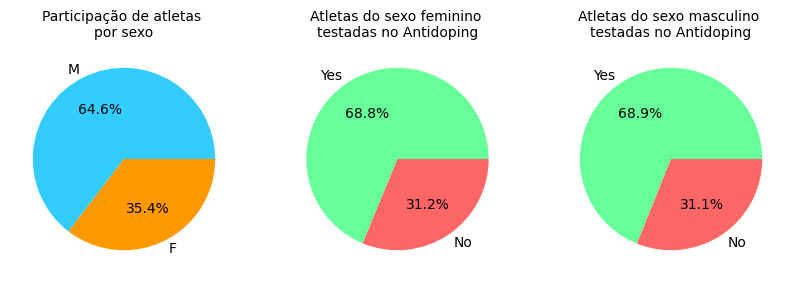

In [23]:
#Gráficos de pizza
# Calcula a contagem de homens e mulheres
count = df_2020['Sex'].value_counts()

# Cria uma figura com dois subplots
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# Plota o gráfico de pizza para o primeiro subplot
ax[0].pie(count.values, labels=count.index,
          colors = ['#33CCFF', '#FF9900'],
          autopct='%1.1f%%')
ax[0].set_title('Participação de atletas \npor sexo', fontsize=10)

# Filtra os dados para as mulheres
df_feminino2020 = df_2020[df_2020['Sex'] == 'F']

# Calcula a contagem de mulheres que passaram no antidoping
count_tested = df_feminino2020['Tested'].value_counts()

# Plota o gráfico de pizza para o segundo subplot
ax[1].pie(count_tested.values, labels=count_tested.index,
          colors = ['#66FF99', '#FF6666'],
          autopct='%1.1f%%')
ax[1].set_title('Atletas do sexo feminino \ntestadas no Antidoping', fontsize=10)

# Filtra os dados para as mulheres
df_masculino2020 = df_2020[df_2020['Sex'] == 'M']

# Calcula a contagem de mulheres que passaram no antidoping
count_testedm = df_masculino2020['Tested'].value_counts()

# Plota o gráfico de pizza para o segundo subplot
ax[2].pie(count_testedm.values, labels=count_testedm.index,
          colors = ['#66FF99', '#FF6666'],
          autopct='%1.1f%%')
ax[2].set_title('Atletas do sexo masculino \ntestadas no Antidoping', fontsize=10)

# Exibe a figura
plt.show()

Foi verificado para o ano de 2020 a participação de 64,6% de homens e 35,4% de mulheres.
O alcance dos testes anti-dopagem foi semelhante para ambos os sexos: 68,8% das atletas dos sexo feminino realizaram testes contra 68,9% dos atletas do sexo masculino.

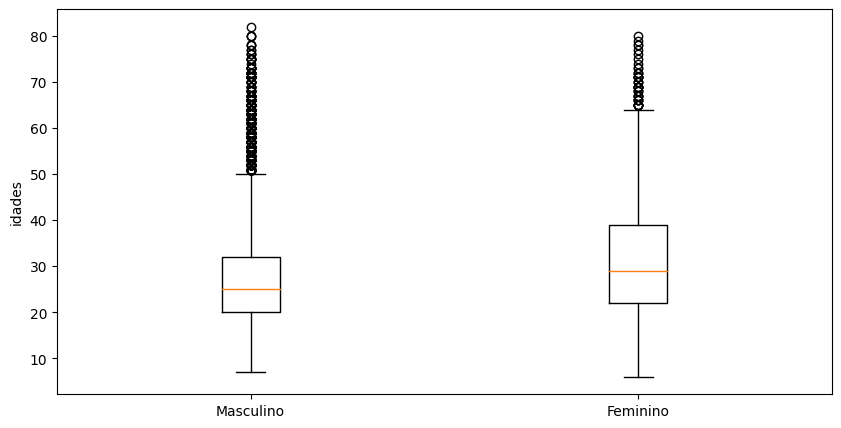

In [24]:
#Estatísticas sobre as idades dos atletas que competiram em powerlifting no ano de 2020
colunas_df_masculino2020 = ['Age2']
colunas_df_feminino2020 = ['Age2']

# Cria os gráficos de boxplot lado a lado dos DataFrames escolhidos
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot([df_masculino2020[colunas_df_masculino2020].values.reshape(-1) , df_feminino2020[colunas_df_feminino2020].values.reshape(-1)])

# Define os rótulos dos eixos x e y
ax.set_xticklabels(['Masculino', 'Feminino'])
ax.set_ylabel('idades')

# Exibe o gráfico
plt.show()


In [41]:
df_masculino2020.describe()

,Age2,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,month,year
count,9084.000000,9084.000000,8913.000000,8810.000000,8860.000000,8611.000000,9084.000000,9084.0
mean,28.051299,91.585964,194.042637,131.164670,222.980386,548.609189,4.299538,2020.0
std,11.090482,20.873027,51.072370,35.617159,48.472807,128.148228,3.171212,0.0
min,7.000000,21.850000,10.000000,9.500000,32.500000,54.500000,1.000000,2020.0
25%,20.000000,77.900000,162.500000,107.500000,192.500000,472.500000,2.000000,2020.0
50%,25.000000,89.000000,192.500000,130.000000,227.500000,550.000000,3.000000,2020.0
75%,32.000000,103.000000,227.500000,152.500000,252.500000,630.000000,8.000000,2020.0
max,82.000000,220.400000,455.000000,292.570000,432.500000,1127.500000,10.000000,2020.0


In [42]:
df_feminino2020.describe()

,Age2,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,month,year
count,4982.000000,4982.000000,4875.000000,4902.000000,4927.000000,4791.000000,4982.000000,4982.0
mean,31.369731,72.378109,112.360468,63.058009,135.524366,311.217017,4.296267,2020.0
std,12.233335,18.442875,31.098535,17.727655,30.199706,74.956877,3.180721,0.0
min,6.000000,27.000000,20.000000,12.500000,35.000000,72.500000,1.000000,2020.0
25%,22.000000,59.532500,92.500000,50.000000,115.000000,260.000000,2.000000,2020.0
50%,29.000000,69.055000,110.000000,60.000000,135.000000,307.500000,3.000000,2020.0
75%,39.000000,81.272500,130.000000,72.500000,155.000000,357.500000,8.000000,2020.0
max,80.000000,185.000000,247.500000,177.500000,272.500000,687.500000,10.000000,2020.0


Podemos verificar que a média de idade das atletas do sexo feminino (31,4 anos) é maior do que atletas do sexo masculino (28,1 anos), assim como suas medianas, 29 anos contra 25 anos, respectivamente.

As medidas dos quartis também mostram uma maior dispersão (ou menor concentração) dos dados de idade das mulheres em relação aos homens. Tais conclusões podem ser retiradas pelos gráficos de distribuição de idade abaixo. 







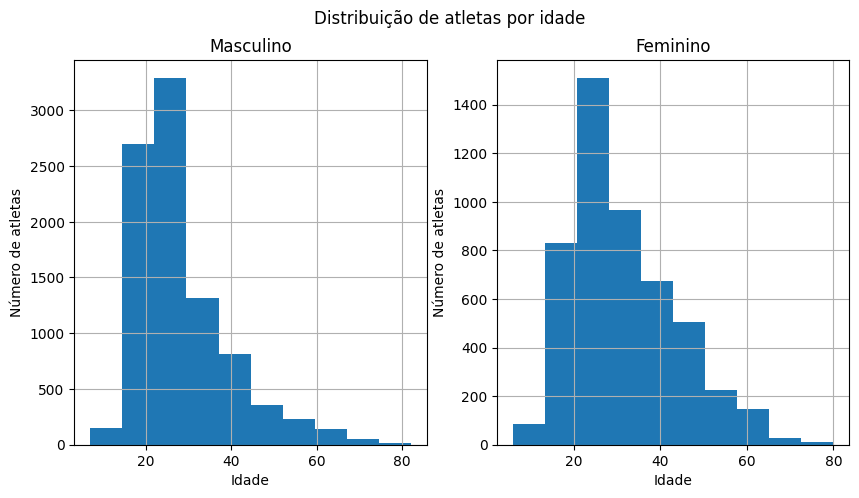

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
df_masculino2020['Age2'].hist(ax=axes[0])
axes[0].set_title('Masculino')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Número de atletas')

df_feminino2020['Age2'].hist(ax=axes[1])
axes[1].set_title('Feminino')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Número de atletas')

fig.suptitle('Distribuição de atletas por idade')
plt.show()



***Conclusão***

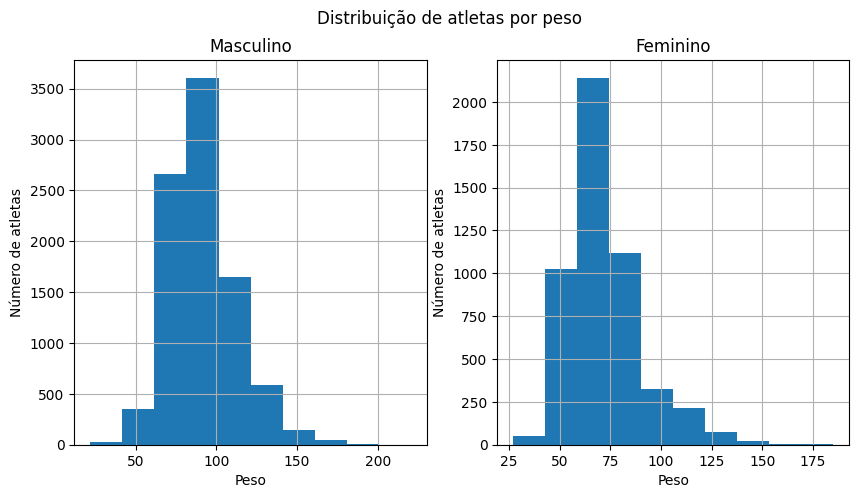

In [36]:
#Distribuição de atletas por peso
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
df_masculino2020['BodyweightKg'].hist(ax=axes[0])
axes[0].set_title('Masculino')
axes[0].set_xlabel('Peso')
axes[0].set_ylabel('Número de atletas')

df_feminino2020['BodyweightKg'].hist(ax=axes[1])
axes[1].set_title('Feminino')
axes[1].set_xlabel('Peso')
axes[1].set_ylabel('Número de atletas')

fig.suptitle('Distribuição de atletas por peso')
plt.show()

<Figure size 800x4000 with 0 Axes>

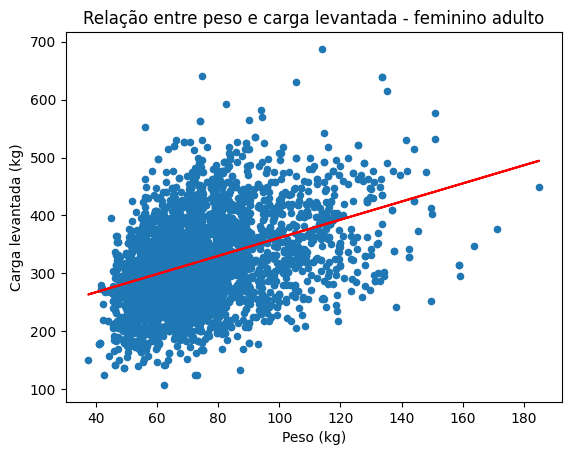

In [37]:
#Dispersão Carga x peso - feminino adulto
# Filtra os dados para as mulheres
df_feminino2020carga = df_feminino2020[(df_feminino2020['Age2'] >= 19) 
& (df_feminino2020['TotalKg'] > 0) & (df_feminino2020['Best3SquatKg'] > 0) & (df_feminino2020['Best3BenchKg'] > 0) 
& (df_feminino2020['Best3DeadliftKg'] > 0)]
plt.figure(figsize=(8, 40))
df_feminino2020carga.plot(kind='scatter', x='BodyweightKg', y='TotalKg')

coef = np.polyfit(df_feminino2020carga['BodyweightKg'], df_feminino2020carga['TotalKg'], 1)
equation = np.poly1d(coef)

# Plotando a linha de tendência
plt.plot(df_feminino2020carga['BodyweightKg'], equation(df_feminino2020carga['BodyweightKg']), color='r')


plt.title('Relação entre peso e carga levantada - feminino adulto')
plt.xlabel('Peso (kg)')
plt.ylabel('Carga levantada (kg)')
plt.show()

<Figure size 800x2000 with 0 Axes>

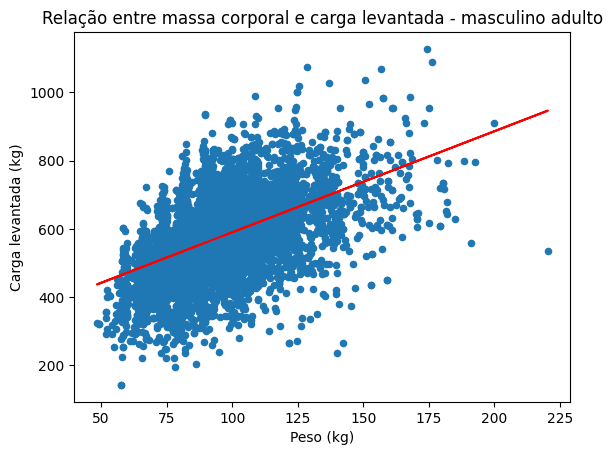

In [38]:
#Dispersão Carga x peso - masculino adulto
# Filtra os dados para os homens
df_masculino2020carga = df_masculino2020[(df_masculino2020['Age2'] >= 19) & (df_masculino2020['TotalKg'] > 0) 
& (df_masculino2020['Best3SquatKg'] > 0) & (df_masculino2020['Best3BenchKg'] > 0) 
& (df_masculino2020['Best3DeadliftKg'] > 0)]
plt.figure(figsize=(8, 20))
df_masculino2020carga.plot(kind='scatter', x='BodyweightKg', y='TotalKg')

coef = np.polyfit(df_masculino2020carga['BodyweightKg'], df_masculino2020carga['TotalKg'], 1)
equation = np.poly1d(coef)

# Plotando a linha de tendência
plt.plot(df_masculino2020carga['BodyweightKg'], equation(df_masculino2020carga['BodyweightKg']), color='r')


plt.title('Relação entre massa corporal e carga levantada - masculino adulto')
plt.xlabel('Peso (kg)')
plt.ylabel('Carga levantada (kg)')
plt.show()

Os gráficos de dispersão acima avaliam a relação entre peso corporal e carga levantada (proxy para força). É um balisador importante para avaliar o desempenho do atleta em relação à média e para escolha de qual categoria de peso se enquadrar.

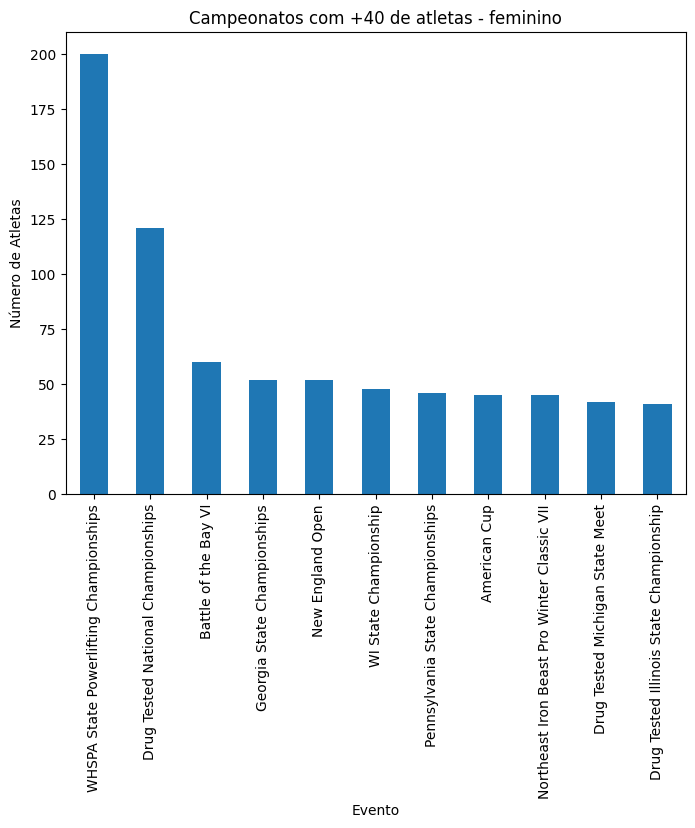

In [43]:
# Contando o número de atletas do sexo feminino inscritas por evento
contagem = df_feminino2020['MeetName'].value_counts()

contagem2 = contagem[(contagem > 40)]

# Criando o gráfico de colunas
contagem2.plot(kind='bar', xlabel='Evento', ylabel='Número de Atletas', figsize=(8, 6), style='ggplot')
plt.title('Campeonatos com +40 de atletas - feminino')
# Exibindo o gráfico
plt.show()

Aqui, verificamos os campeonatos com mais inscritos como proxy para o nível de importância e competividade. 








#***Considerações Finais***#

---

O presente estudo se limitou a analisar o ano de 2020 utilizando a carga total levantada pelos atletas como proxy para força, podendo outras análises serem feitas em estudos posteriores, como:
- análise por exercício (supino, agachamento e deadlift);
- análise de evolução temporal (comparação intertemporal de amostras);
- análises por competição;
- análises espaciais.